In [100]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [101]:
df = pd.read_csv('datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


In [102]:
df.isnull

<bound method DataFrame.isnull of       Gender  Years_in_US  Family_income  ArmCircum  SaggitalAbdominal  \
0          1          0.0           0.84       35.3               20.6   
1          1          0.0           1.78       34.7               24.4   
2          1          0.0           4.51       33.5               25.6   
3          1          0.0           2.52       21.0               14.9   
4          2          0.0           5.00       25.2               20.7   
...      ...          ...            ...        ...                ...   
9808       2          4.0           1.25       29.9               19.1   
9809       1          0.0           1.06       14.7               20.7   
9810       1          0.0           5.00       37.0               24.3   
9811       2          3.0           1.53       19.0               20.7   
9812       2          0.0           3.46       25.0               17.5   

      GripStrength  Breast_fed  Diabetes  
0             55.2         2.0    

In [103]:
df.isnull().sum()

Gender               0
Years_in_US          0
Family_income        0
ArmCircum            0
SaggitalAbdominal    0
GripStrength         0
Breast_fed           0
Diabetes             0
dtype: int64

<Axes: >

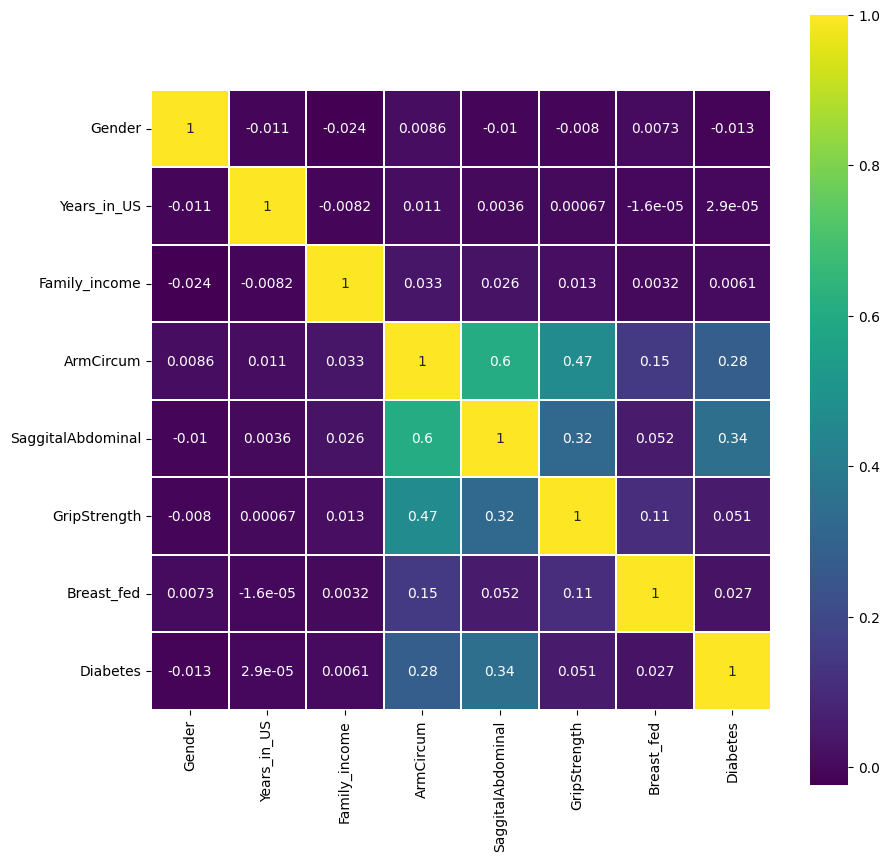

In [104]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [105]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [106]:
# Создание и обучение StandardScaler на тренировочной выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Применение обученного StandardScaler к тренировочной и тестовой выборкам
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [107]:
kmeans = KMeans(n_clusters=3, tol=0.0005, random_state=1)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=1, tol=0.0005)

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [108]:
rforest = RandomForestClassifier(random_state=1)
rforest.fit(X_train_scaled, y_train)

lreg = LogisticRegression(random_state=1)
lreg.fit(X_train_scaled, y_train)

lsvc = LinearSVC(random_state=1)
lsvc.fit(X_train_scaled, y_train)

LinearSVC(random_state=1)

In [109]:
# Распечатаем качество моделей на тестовой выборке (accuracy_score)
print('KMeans accuracy: {:.3f}'.format(accuracy_score(y_test, kmeans.predict(X_test_scaled))))
print('RandomForest accuracy: {:.3f}'.format(accuracy_score(y_test, rforest.predict(X_test_scaled))))
print('LogisticRegression accuracy: {:.3f}'.format(accuracy_score(y_test, lreg.predict(X_test_scaled))))
print('LinearSVC accuracy: {:.3f}'.format(accuracy_score(y_test, lsvc.predict(X_test_scaled))))

KMeans accuracy: 0.342
RandomForest accuracy: 0.886
LogisticRegression accuracy: 0.888
LinearSVC accuracy: 0.892


In [110]:
# Форматирование под задание 5
rforest_accuracy_norm = accuracy_score(y_test, rforest.predict(X_test_scaled))
lreg_accuracy_norm = accuracy_score(y_test, lreg.predict(X_test_scaled))
lsvc_accuracy_norm = accuracy_score(y_test, lsvc.predict(X_test_scaled))

print('{:.3f}, {:.3f}, {:.3f}'.format(rforest_accuracy_norm, lreg_accuracy_norm, lsvc_accuracy_norm))

0.886, 0.888, 0.892


Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [111]:
# Преобразование массивов NumPy в датафреймы Pandas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Добавляем в датафрейм столбец с предсказаниями модели KMeans
X_train_cluster = pd.concat([X_train_scaled_df, pd.DataFrame(kmeans.predict(X_train_scaled), columns=['cluster'])], axis=1)
X_test_cluster = pd.concat([X_test_scaled_df, pd.DataFrame(kmeans.predict(X_test_scaled), columns=['cluster'])], axis=1)


In [112]:
# Проверим сколько null значений в каждом столбце
X_train_cluster.isnull().sum()
X_test_cluster.isnull().sum()

Gender               0
Years_in_US          0
Family_income        0
ArmCircum            0
SaggitalAbdominal    0
GripStrength         0
Breast_fed           0
cluster              0
dtype: int64

In [113]:
# Обучаем модели заного на новых данных
rforest = RandomForestClassifier(random_state=1)
rforest.fit(X_train_cluster, y_train)

lreg = LogisticRegression(random_state=1)
lreg.fit(X_train_cluster, y_train)

lsvc = LinearSVC(random_state=1)
lsvc.fit(X_train_cluster, y_train)

LinearSVC(random_state=1)

In [114]:
# Распечатаем качество моделей на тестовой выборке (accuracy_score)
print('RandomForest accuracy: {:.3f}'.format(accuracy_score(y_test, rforest.predict(X_test_cluster))))
print('LogisticRegression accuracy: {:.3f}'.format(accuracy_score(y_test, lreg.predict(X_test_cluster))))
print('LinearSVC accuracy: {:.3f}'.format(accuracy_score(y_test, lsvc.predict(X_test_cluster))))

RandomForest accuracy: 0.888
LogisticRegression accuracy: 0.888
LinearSVC accuracy: 0.892


In [115]:
# Форматирование под задание 6
rforest_accuracy = accuracy_score(y_test, rforest.predict(X_test_cluster))
lreg_accuracy = accuracy_score(y_test, lreg.predict(X_test_cluster))
lsvc_accuracy = accuracy_score(y_test, lsvc.predict(X_test_cluster))

print('{:.3f}, {:.3f}, {:.3f}'.format(rforest_accuracy, lreg_accuracy, lsvc_accuracy))

0.888, 0.888, 0.892


Сравним полученные результаты, после добавления k-means признака

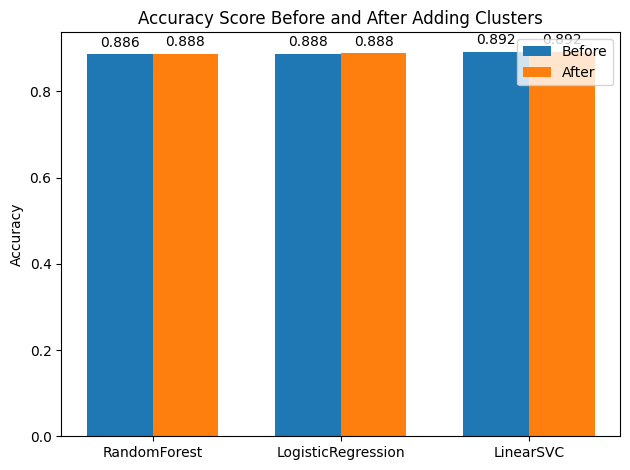

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Результаты до добавления кластеров
accuracy_before = [
    rforest_accuracy_norm,
    lreg_accuracy_norm,
    lsvc_accuracy_norm
]

# Результаты после добавления кластеров
accuracy_after = [
    rforest_accuracy,
    lreg_accuracy,
    lsvc_accuracy,
]

labels = ['RandomForest', 'LogisticRegression', 'LinearSVC']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_before, width, label='Before')
rects2 = ax.bar(x + width/2, accuracy_after, width, label='After')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Score Before and After Adding Clusters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [119]:
# Расстояния от объектов до центров кластеров
X_train_distances = kmeans.transform(X_train_scaled)
X_test_distances = kmeans.transform(X_test_scaled)

# Обучение моделей на расстояниях до центров кластеров
rforest_dist = RandomForestClassifier(random_state=1)
rforest_dist.fit(X_train_distances, y_train)

lreg_dist = LogisticRegression(random_state=1)
lreg_dist.fit(X_train_distances, y_train)

lsvc_dist = LinearSVC(random_state=1)
lsvc_dist.fit(X_train_distances, y_train)

# Расчет метрик accuracy
accuracy_rforest_dist = accuracy_score(y_test, rforest_dist.predict(X_test_distances))
accuracy_lreg_dist = accuracy_score(y_test, lreg_dist.predict(X_test_distances))
accuracy_lsvc_dist = accuracy_score(y_test, lsvc_dist.predict(X_test_distances))

print("RandomForestClassifier accuracy: {:.3f}".format(accuracy_rforest_dist))
print("LogisticRegression accuracy: {:.3f}".format(accuracy_lreg_dist))
print("LinearSVC accuracy: {:.3f}".format(accuracy_lsvc_dist))

print('{:.3f}, {:.3f}, {:.3f}'.format(accuracy_rforest_dist, accuracy_lreg_dist, accuracy_lsvc_dist))


RandomForestClassifier accuracy: 0.881
LogisticRegression accuracy: 0.892
LinearSVC accuracy: 0.892
0.881, 0.892, 0.892


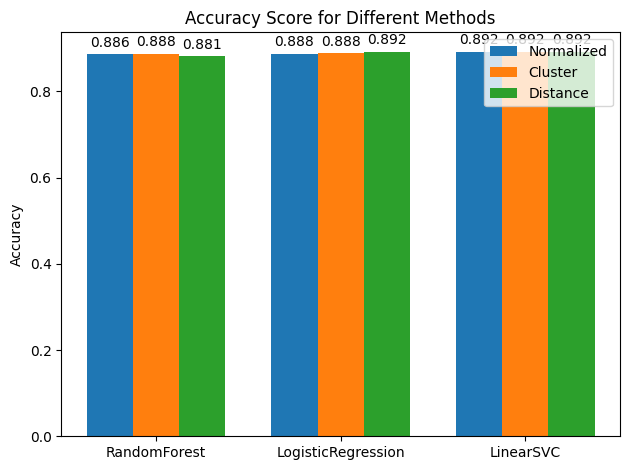

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Результаты accuracy для каждого метода
accuracy_norm = [rforest_accuracy_norm, lreg_accuracy_norm, lsvc_accuracy_norm]
accuracy_cluster = [rforest_accuracy, lreg_accuracy, lsvc_accuracy]
accuracy_dist = [accuracy_rforest_dist, accuracy_lreg_dist, accuracy_lsvc_dist]

labels = ['RandomForest', 'LogisticRegression', 'LinearSVC']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy_norm, width, label='Normalized')
rects2 = ax.bar(x, accuracy_cluster, width, label='Cluster')
rects3 = ax.bar(x + width, accuracy_dist, width, label='Distance')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Score for Different Methods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()



**Задание 2** Задача кластеризации может использоваться не только для специфических задач группировки данных, но и для оптимизации других методов. Вы уже знаете, что одна из основных проблем kNN в скорости его предсказания. В этом задании попробуем ускорить работу kNN с помощью кластеризации, не теряя при этом сильно в качестве.

Сначала загрузим уже известные вам данные клиентов страховой компании.

In [124]:
data = pd.read_csv('processed_vehicle_inssurance.csv')
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [125]:
### Разделим выборку на трейн-тест

from sklearn.model_selection import train_test_split
X = data.drop('Response', axis=1)[:25000]
y = data['Response'][:25000]

X_train, X_test, y_train, y_test = train_test_split(X, y.values,
                                                    random_state=0,
                                                    test_size=0.2)

In [126]:
### Нормируем данные

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучите обычный kNN с одним соседом и измерьте качество, например, взвешенную f-меру, чтобы потом сравнить с нашей реализацией.

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Обучение kNN с одним соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)

# Измерение взвешенной f-меры
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted)


0.8259679418155178
